## Debut de Code : 
Le code commence par inviter l'utilisateur à saisir un message qu'il souhaite crypter, après le code passe par un algorithme python qui crypte le message de l'utilisateur en utilisant l'ASCII et le code binaire.


In [31]:
import numpy as np                   #Ce module permet d’effectuer des calculs numériques avec Python
import matplotlib.pyplot as plt      #Ce module permet de créer et personnaliser des graphiques
import sounddevice as sd  

# Définition de la fonction de division euclidienne
def Division_eucl(data, key):
    pointer = len(key)
    current_data = data[:pointer]

    while pointer < len(data):
        current_bit = current_data[0]
        current_data = ''.join(['1' if b1 != b2 else '0' for b1, b2 in zip(key, current_data[1:])]) + data[pointer]
        pointer += 1

        if current_bit == '0':
            continue
        else:
            current_data = ''.join(['1' if b1 != b2 else '0' for b1, b2 in zip(key, current_data)])

    return current_data

# Définition du converteur texte/ASCII

def texte_vers_ascii(texte):
    ascii_liste = [ord(char) for char in texte]
    return ascii_liste

# Définition du convertisseur ASCII/binaire

def ascii_vers_binaire(ascii_liste):
    binaire_liste = [bin(ascii_val)[2:].zfill(8) for ascii_val in ascii_liste]
    return binaire_liste

# Définition de la fonction d'encodage

def encodage(data, key):
    remainder = Division_eucl(data, key)
    encoded_data = data + remainder[1:]
    return encoded_data[:len(data)]

# Définition du convertisseur binaire/texte

def binaire_vers_texte(binary_str):
    octets = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    texte = ''.join(chr(int(octet, 2)) for octet in octets if len(octet) == 8)
    return texte

# Entrée du message
message_texte = str(input('Entrez le message à envoyer : '))

# Conversion du texte en ASCII puis en binaire
ascii_resultat = texte_vers_ascii(message_texte)
binaire_resultat = ascii_vers_binaire(ascii_resultat)
total_binary = ''.join(binaire_resultat)
print(f"Texte : {message_texte}")
print(f"Valeurs ASCII : {ascii_resultat}")
print(f"Valeurs binaires : {binaire_resultat}")
print(f'Le message en binaire est : {total_binary}')
# Fonction pour créer une trame à partir de données


Texte : enzi is gzgezgz
Valeurs ASCII : [101, 110, 122, 105, 32, 105, 115, 32, 103, 122, 103, 101, 122, 103, 122]
Valeurs binaires : ['01100101', '01101110', '01111010', '01101001', '00100000', '01101001', '01110011', '00100000', '01100111', '01111010', '01100111', '01100101', '01111010', '01100111', '01111010']
Le message en binaire est : 011001010110111001111010011010010010000001101001011100110010000001100111011110100110011101100101011110100110011101111010


## La Trame 
Ce code Python définit deux fonctions, create_frame et decode_frame, et les utilise pour encapsuler et extraire des données dans une trame.

    create_frame(data) :
        Ajoute des délimiteurs de début et de fin à la chaîne binaire d'entrée (data).
        Renvoie la trame résultante.

    decode_frame(frame) :
        Vérifie et extrait les données entre les délimiteurs de début et de fin dans la trame.
        Affiche un message d'erreur si les délimiteurs sont incorrects.

    Exemple d'utilisation :
        Crée une trame en encadrant le message binaire.
        Affiche la trame créée.
        Décrypte la trame pour extraire les données et les affiche.

Ce code illustre un mécanisme simple de cadrage utilisé dans les communications pour structurer les données lors de la transmission.



In [32]:
def create_frame(data):
    start_delimiter = "10101010"  # Délimiteur de début
    end_delimiter = "10101011" 
    frame = start_delimiter + data + end_delimiter
    return frame

# Fonction pour décomposer une trame en données
def decode_frame(frame):
    start_delimiter = "10101010"  # Délimiteur de début
    end_delimiter = "10101011" 
    
    # Vérifier les délimiteurs de début et de fin
    if frame.startswith(start_delimiter) and frame.endswith(end_delimiter):
        # Extraire les données entre les délimiteurs
        data = frame[len(start_delimiter):-len(end_delimiter)]
        return data
    else:
        print("Erreur de trame : délimiteurs incorrects.")
        return None

# Exemple d'utilisation
message_to_send = total_binary
frame_to_send = create_frame(message_to_send)
print("Trame créée :", frame_to_send)

decoded_data = decode_frame(frame_to_send)
if decoded_data is not None:
    print("Données extraites de la trame :", decoded_data)


Trame créée : 1010101001100101011011100111101001101001001000000110100101110011001000000110011101111010011001110110010101111010011001110111101010101011
Données extraites de la trame : 011001010110111001111010011010010010000001101001011100110010000001100111011110100110011101100101011110100110011101111010


## L'encodage on XOR

Le code est l'encodage d'une séquence de données (`data`) en utilisant un code de correction d'erreur par division modulo-2 (XOR). Voici une explication détaillée :

1. **`xor(a, b)` :**
   - Cette fonction effectue une opération XOR bit à bit entre les chaînes binaires `a` et `b`.
   - Elle itère sur les bits et ajoute le résultat à une liste, qui est ensuite convertie en une chaîne de caractères et renvoyée.

2. **`mod2divison(divident, divisor)` :**
   - Cette fonction effectue la division modulo-2 en utilisant l'opération XOR.
   - Elle prend le diviseur et le diviseur, effectue la division bit à bit, et renvoie le reste.

3. **`encodeData(data, key)` :**
   - Cette fonction est utilisée du côté émetteur pour encoder les données en ajoutant le reste de la division modulo-2 à la fin des données.
   - Elle ajoute des zéros à la fin des données pour permettre la division, puis appelle la fonction `mod2divison` pour obtenir le reste.
   - Le reste est ajouté à la fin des données d'origine pour former le mot de code, qui est renvoyé.

4. **Exemple d'utilisation :**
   - Une clé (`key`) est définie comme "10011".
   - Les données (`data`) sont définies comme `total_binary`.
   - La fonction `encodeData` est utilisée pour encoder les données en utilisant la clé.
   - Le mot de code encodé est affiché.

En résumé, le code met en œuvre un mécanisme de codage d'erreur pour ajouter de la redondance aux données, ce qui permet de détecter et de corriger les erreurs lors de la transmission.

In [33]:
# Définition de la fonction XOR
def xor(a, b):
   
    # Initialisation du résultat
    result = [] # Création d'une liste vide

    for i in range(1, len(b)):
        if a[i] != b[i]:
            result.append('1')  # Ajouter '1' à la liste
        else:
            result.append('0')  # Ajouter '0' à la liste
    return ''.join(result)
   
   
# Performe un division modulo-2

def mod2divison(divident, divisor):
   
    # Le nombre de bits à XOR à la fois
    pick = len(divisor)
   
    # Diviser la dividante en une longeur appropriée à une étape spécifique

    tmp = divident[0 : pick]
   
    while pick < len(divident):
   
        if tmp[0] == '1':
   
            # Remplcage de la dividente par le résultat du XOR et passer d'un bit

            tmp = xor(divisor, tmp) + divident[pick]
   
        else:   # Si le bit de gauche est '0'
  
            # If the leftmost bit of the dividend (or the
            # part used in each step) is 0, the step cannot
            # use the regular divisor; we need to use an
            # all-0s divisor.
            tmp = xor('0'*pick, tmp) + divident[pick]
   
        pick += 1
   
    # Pour les derniers n bits, nous devons le faire sortir, car la valeur augmentée de pick causerait un Index Out of Bounds

    if tmp[0] == '1':
        tmp = xor(divisor, tmp)
    else:
        tmp = xor('0'*pick, tmp)
   
    checkword = tmp
    return checkword
   
# Fonction utilisée par l'envoyeur pour ajouter le résultat de la division modulaire 

def encodeData(data, key):
   
    l_key = len(key)
   
    # Ajoute n-1 zeros à la fin du message
    appended_data = data + '0'*(l_key-1)
    remainder = mod2divison(appended_data, key)
   
    # Ajouter le reste dans le data original
    codeword = data + remainder
    return codeword 

key = "10011"
data = total_binary

Encoded_data = encodeData(data,key)
print("Encoded data for transmission: ", Encoded_data)

Encoded data for transmission:  0110010101101110011110100110100100100000011010010111001100100000011001110111101001100111011001010111101001100111011110101001


## Codage  Manchester  
Ce code réalise le codage Manchester d'une séquence de données binaire (Encoded_data). Le codage Manchester est une technique de modulation de ligne utilisée en télécommunications, où chaque bit de la séquence binaire est représenté par une transition dans le signal.
    Conversion binaire en booléen :
    
    message_bool = [bit == '1' for bit in Encoded_data]
        Convertit chaque bit de la séquence binaire Encoded_data en un booléen (True si le bit est '1', False sinon).

    Codage Manchester :
        message_code = [1 if bit else 0 for bool_bit in message_bool for bit in [1, 0]]
            Réalise le codage Manchester en utilisant une compréhension de liste.
            Pour chaque booléen dans message_bool, ajoute [1, 0] si le booléen est True (représentant un bit '1') et [0, 1] sinon.

    Affichage du message codé :
        print("Message codé avec Manchester :", message_code)
            Affiche la séquence de bits codée en Manchester.

En résumé, ce code compact réalise la conversion de la séquence binaire Encoded_data en une séquence de bits codée en Manchester. Chaque bit '1' est représenté par [1, 0] (transition montante), et chaque bit '0' est représenté par [0, 1] (transition descendante) dans la séquence résultante message_code.


In [34]:
# Codage Manchester du message
message_bool = [bit == '1' for bit in Encoded_data]
message_code = []
for ii in range(len(message_bool)):
    if message_bool[ii]:
        message_code.extend([1, 0])
    else:
        message_code.extend([0, 1])

print("Message codé avec Manchester :", message_code)

Message codé avec Manchester : [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]


## Modulation FSK 

Ce code effectue la modulation de fréquence par déplacement de fréquence (FSK) d'une séquence binaire (message_code) 

initialisation des paramètres :

    Fréquence d'échantillonnage (Fe), fréquences des porteuses (Fp1 et Fp2), débit binaire (baud), etc.

Duplication du message binaire :

    M_duplique = np.repeat(M, Ns)
        Duplique chaque bit du message binaire pour obtenir une séquence à moduler.

Génération des porteuses P1 et P2 :

    P1, P2 : Porteuses pour les bits '1' et '0'.

Modulation FSK :

    FSK = [P1[i] if M_duplique[i] == 1 else P2[i] for i in range(len(M_duplique))]
        Modulation FSK en sélectionnant la porteuse appropriée pour chaque bit.

Affichage des signaux :

    Affiche le message binaire et le signal modulé FSK.

Lecture du signal modulé :

    sd.play(FSK, Fe)
        Joue le signal modulé.

[0.0, 0.9893554255245747, 0.28794045010251906, -0.9055536888925841, -0.5514913743150942, 0.745048504960584, 0.7683291217331284, -0.5214352033794981, -0.9200868048537143, 0.2536545839095076, 0.9939100368057142, 0.03561143311112636, -0.9835457412105524, -0.32186104181006375, 0.8898718088114687, 0.5808479362589049, -0.7208227371708802, -0.7906350542454085, 0.49071755200393835, 0.9334527203256263, -0.2190469374748193, -0.9972037971811801, -0.07117769039543966, 0.9764883538925819, 0.3553733281669926, -0.8730610582747539, -0.6094676481666174, 0.6956825506034832, 0.8119380057158565, -0.45937738787877447, -0.9456344796221884, 0.18416141324508123, 0.9992325282639969, 0.10665365333511861, -0.9681922164062943, -0.38843479627469796, 0.8551427630053468, 0.6373142037445798, -0.6696598375080248, -0.8322109517210735, 0.4274544683993961, 0.9566166292499507, -0.14904226617617447, -0.9999936564536084, -0.14199431795762474, 0.9586678530366605, 0.4210035051320267, -0.8361396537313595, -0.6643522775070521, 

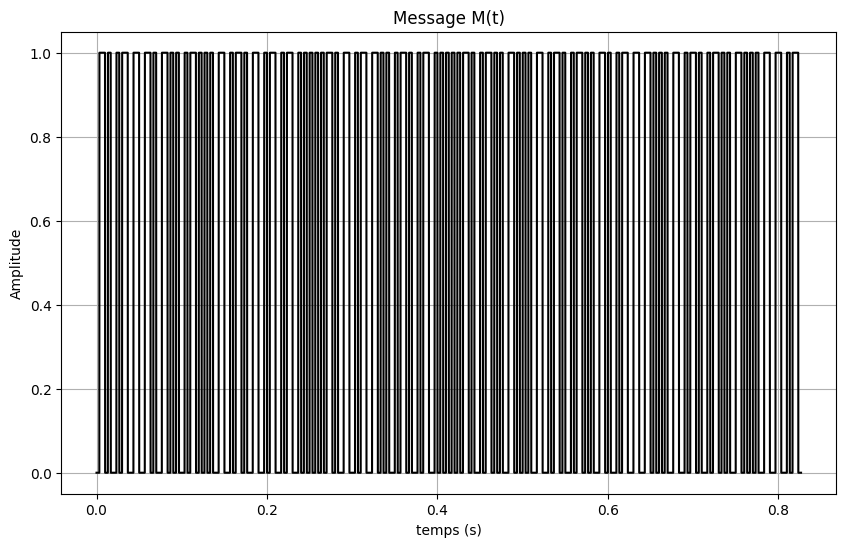

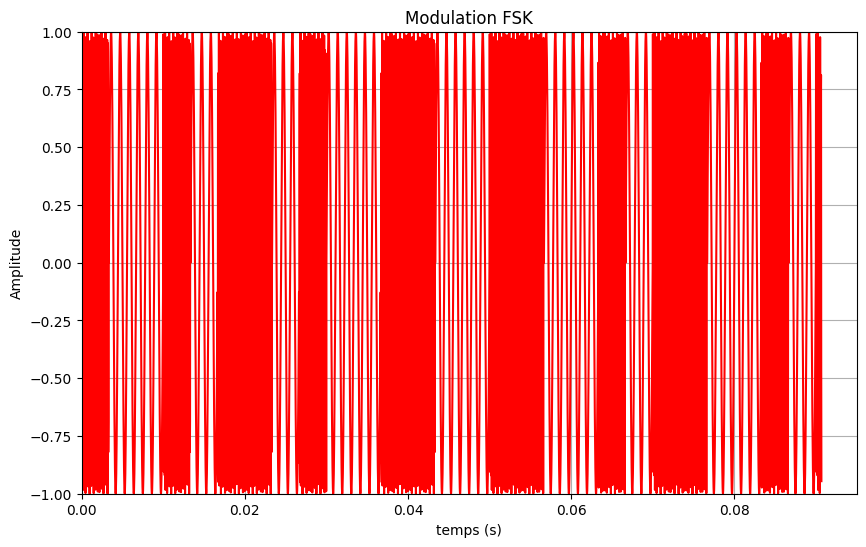

In [35]:
M = message_code                           #Stockage du mesage dans une variable "M"
Fe = 44100                                 #Initialisation de la fréquence d'échantillonnage à 88 200Hz (soit le double de 44 100Hz)
Fp = 10000                                #Initialisation de la fréquence de la porteuse à 35 000Hz (Pour que le son sot inaudible)
baud = 300                                 #Initialisation du débit souhaité sur le canal de transmission à 600bit/s
Nbits = len(M)                             #Initialisation du nombre de bits initial
Ns = Fe/baud                               #Initialisation du nombre de symboles par bit (Fréquence d'échantillonnage/débit binaire)
N = Nbits*Ns                               #Initialisation du nombre de bits total à moduler (Nombre de symbole par bits*Nombre de bits)

M_duplique = np.repeat(M,Ns)                                                  # On génère le message binaire dupliqué

t = np.arange (0.0,N)/Fe                                                      #On génère le vecteur temps

# Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
A1 =  1                                        
A2 =  1                  
fp1 =  900                
fp2 =  10000 
P1 =  A1*np.sin(2*np.pi*fp1*t)                                               
P2 =  A2*np.sin(2*np.pi*fp2*t)

FSK=[P1[i] if M_duplique[i]==1 else P2[i] for i in range(len(M_duplique))] 
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

#Affichage du signal modulé
plt.figure (figsize = (10,6))
plt.plot(t[0:4000],FSK[0:4000],'r')
plt.title('Modulation FSK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.095,-1,1])
plt.grid()
sd.play(FSK,Fe)
print(FSK)

## Modulation ASK 

Ce code effectue la modulation d'amplitude par déplacement de fréquence (ASK) d'une séquence binaire (message_code).

    Initialisation des paramètres :
        Fréquence d'échantillonnage (Fe), débit binaire (baud), etc.

    Duplication du message binaire :
        M_duplique = np.repeat(message_code, Ns)
            Duplique chaque bit du message binaire pour obtenir une séquence à moduler.

    Génération de la porteuse :
        Porteuse = Ap * np.sin(2 * np.pi * Fp * t)
            Génère la porteuse sinusoïdale à la fréquence Fp.

    Modulation ASK :
        ASK = Porteuse * M_duplique
            Effectue la modulation d'amplitude (ASK) en multipliant la porteuse par la séquence binaire.

    Affichage des signaux :
        Affiche le message binaire et le signal modulé ASK.

    Émission du signal sonore :
        sd.play(ASK, Fe)
            Joue le signal modulé sous forme de son.

La modulation avec ASK est :[ 0.  0.  0. ... -0. -0. -0.]


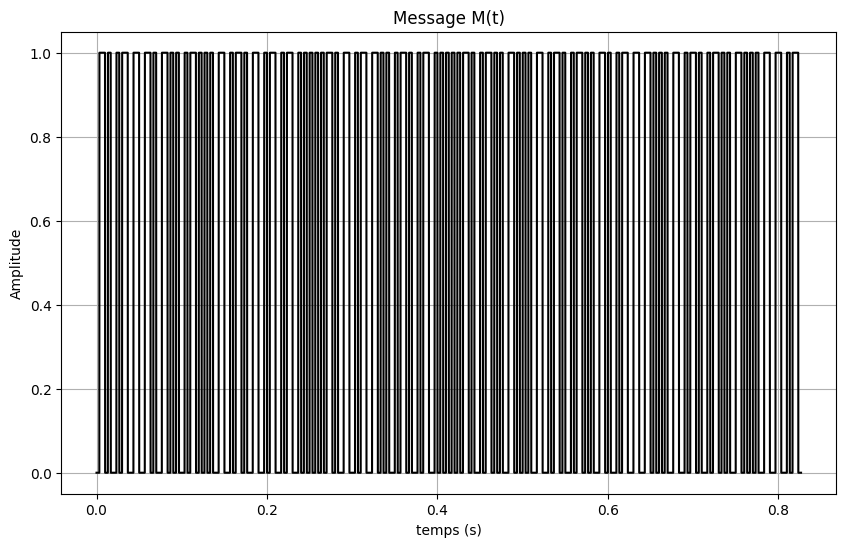

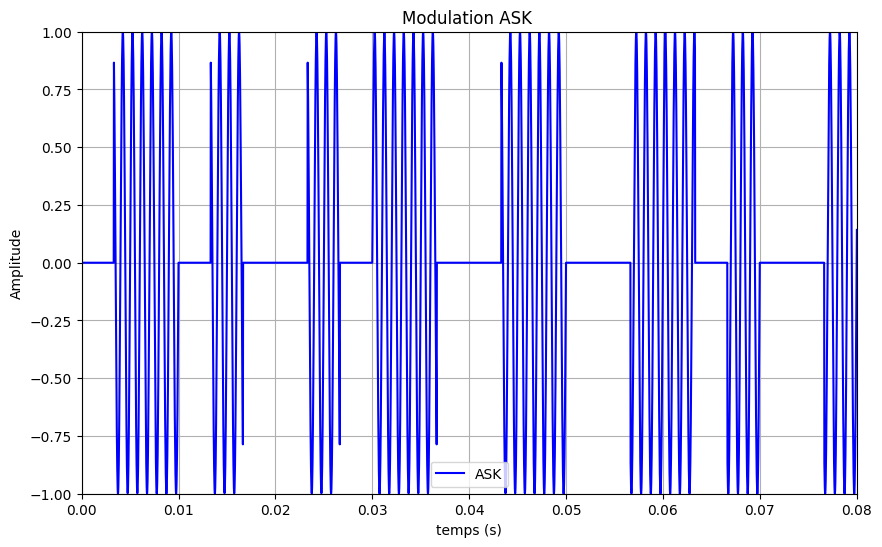

In [44]:
Fe = 44100
baud = 300
Ns = int(Fe / baud)
Nbits = len(message_code)
N = int(Nbits * Ns)

# Duplication du message binaire
M_duplique = np.repeat(message_code, Ns)

t = np.arange(0.0, N) / Fe

# Génération de la porteuse
Ap = 1
Fp = 1000
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

# Modulation ASK
ASK = Porteuse * M_duplique
print(f'La modulation avec ASK est :{ASK}')
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du signal modulé ASK et FSK
plt.figure(figsize=(10, 6))
plt.plot(t, ASK, 'b', label='ASK')
plt.title('Modulation ASK ')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.08,-1,1])
plt.legend()
plt.grid()
plt.show()
# Émission du message sous forme de signal (Jouer le son)
sd.play(ASK, Fe)
sd.wait()

# Démodulation ASK 

Ce code effectue la démodulation d'amplitude par déplacement de fréquence (ASK) d'un signal modulé

nitialisation des paramètres :

    Fréquence d'échantillonnage (Fe), débit binaire (baud), etc.

Génération de la porteuse :

    Porteuse = Ap * np.sin(2 * np.pi * Fp * t)
        Génère la porteuse sinusoïdale à la fréquence Fp.

Réception du signal modulé ASK :

    signal_recu = ASK * Porteuse
        Multiplie le signal modulé ASK par la porteuse.

Filtre passe-bas pour extraire le signal de base :

    signal_base = np.convolve(signal_recu, b, mode='same')
        Applique un filtre passe-bas en convoluant le signal reçu avec un filtre.

Décodage avec un seuil :

    message_decode = np.where(signal_base > seuil, 1, 0)
        Décodage du signal en utilisant un seuil pour distinguer les bits '0' et '1'.

Affichage du signal démodulé :

    Affiche le signal démodulé après l'application du filtre passe-bas.

Émission du signal démodulé :

    sd.play(message_decode, Fe)
        Joue le signal démodulé sous forme de son.

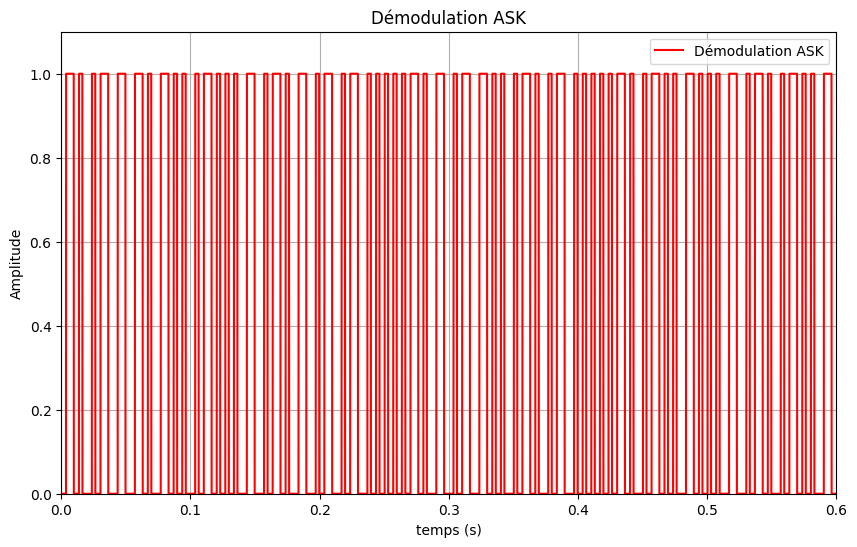

In [37]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Paramètres de la modulation
Fe = 44100
baud = 300
Ns = int(Fe / baud)
Fp = 1000
Ap = 1

# Génération de la porteuse
t = np.arange(0.0, N) / Fe
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

# Réception du signal modulé ASK
signal_recu = ASK * Porteuse

# Filtre passe-bas pour extraire le signal de base
fc = Fp  # fréquence de coupure
w = 2 * np.pi * fc / Fe
b, a = np.ones(Ns) / Ns, [1, -np.exp(-1j * w)]
signal_base = np.convolve(signal_recu, b, mode='same')

# Décodage avec un seuil
seuil = 0.3
message_decode = np.where(signal_base > seuil, 1, 0)

# Affichage du signal démodulé
plt.figure(figsize=(10, 6))
plt.plot(t, message_decode, 'r', label='Démodulation ASK')
plt.title('Démodulation ASK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.6, 0, 1.1])
plt.legend()
plt.grid()
plt.show()
sd.play(message_decode,Fe)


## Démodulation FSK 

Ce code effectue la démodulation de fréquence par déplacement de fréquence (FSK) d'un signal modulé.

    Initialisation des paramètres :
        Fréquence d'échantillonnage (Fe), fréquences des porteuses (Fp1 et Fp2), débit binaire (baud), etc.

    Génération des porteuses P1 et P2 :
        P1 et P2 : Porteuses pour les bits '1' et '0'.

    Réception du signal modulé FSK :
        signal_recu = FSK

    Ajustement des dimensions de P1 et P2 :
        P1 et P2 sont ajustées à la longueur du signal reçu.

    Détecteur de phase :
        phase_diff_P1 et phase_diff_P2 : Calculent la différence de phase entre le signal reçu et les porteuses P1 et P2.

    Décodage en comparant les différences de phase :
        message_decode = np.where(phase_diff_P1 < phase_diff_P2, 1, 0)

    Affichage du signal démodulé :
        Affiche le signal démodulé après la comparaison des différences de phase.

Ce code décode le signal FSK en comparant les différences de phase entre le signal reçu et les porteuses associées aux bits '1' et '0'.

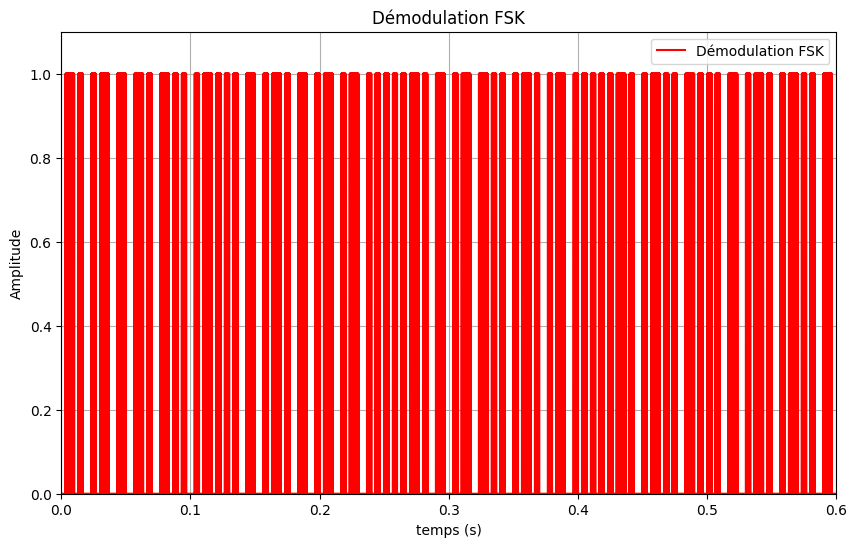

In [38]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Paramètres de la modulation
Fe = 44100
Fp1 = 900  # Fréquence pour le bit 1
Fp2 = 10000  # Fréquence pour le bit 0
baud = 300
Ns = int(Fe / baud)

# Génération des porteuses
t = np.arange(0.0, N) / Fe
P1 = np.sin(2 * np.pi * Fp1 * t)
P2 = np.sin(2 * np.pi * Fp2 * t)

# Réception du signal modulé FSK

signal_recu = FSK

# Ajustement des dimensions de P1 et P2
P1 = np.resize(P1, len(signal_recu))
P2 = np.resize(P2, len(signal_recu))

# Détecteur de phase
phase_diff_P1 = np.angle(signal_recu * np.conj(P1))
phase_diff_P2 = np.angle(signal_recu * np.conj(P2))

# Décodage en comparant les différences de phase
message_decode = np.where(phase_diff_P1 < phase_diff_P2, 1, 0)

# Affichage du signal démodulé
plt.figure(figsize=(10, 6))
plt.plot(t, message_decode, 'r', label='Démodulation FSK')
plt.title('Démodulation FSK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.6, 0, 1.1])
plt.legend()
plt.grid()
plt.show()


# Décodage Manchester :

La fonction manchester_decode prend une séquence encodée en Manchester (message_code) en entrée et la décode en une séquence binaire. 

    Fonction manchester_decode :
        Prend une séquence encodée en Manchester (message_code) en entrée.

    Boucle de décodage :
        Parcourt la séquence encodée en Manchester par pas de 2.
        Si la paire de bits est [1, 0], ajoute un '1' à la séquence décodée.
        Si la paire de bits est [0, 1], ajoute un '0' à la séquence décodée.
        Sinon, lève une erreur si la séquence n'est pas une paire valide pour l'encodage Manchester.

    Affichage du résultat :
        Affiche la séquence encodée en Manchester et la séquence décodée.

La fonction permet de démoduler une séquence encodée en Manchester en reconstruisant la séquence binaire d'origine.

In [39]:
def manchester_decode( message_code):
    decoded_data = []
    for i in range(0, len( message_code), 2):
        if  message_code[i] == 1 and  message_code[i + 1] == 0:
            decoded_data.append(1)
        elif  message_code[i] == 0 and  message_code[i + 1] == 1:
            decoded_data.append(0)
        else:
            raise ValueError("Invalid Manchester encoding")

    return decoded_data

 # Remplacez cela par votre séquence encodée
decoded_data = manchester_decode( message_code)

print("Séquence encodée de Manchester:",  message_code)
print("Séquence décodée de Manchester:", decoded_data)

Séquence encodée de Manchester: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]
Séquence décodée de Manchester: [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0

# Détection d'erreur 

Ce code effectue le décodage Manchester d'une séquence encodée en Manchester (message_code). Ensuite, il simule la réception des données encodées, utilise la fonction de décodage CRC (decodage), et affiche si une erreur de transmission est détectée.

    Décodage Manchester :
        La séquence encodée en Manchester (message_code) est parcourue par paires de bits.
        Chaque paire [1, 0] est décodée en un '1', et [0, 1] est décodée en un '0'.

    Affichage du message décodé :
        La séquence décodée est affichée.

    Définition de la fonction de décodage CRC (decodage) :
        La fonction utilise la division euclidienne sur les données reçues et le code de correction d'erreur (key).
        Si le reste n'est pas zéro, une erreur de transmission est détectée.

    Exemple d'utilisation de la fonction de décodage :
        Les données reçues sont simulées à l'aide de la fonction d'encodage (encodeData).
        La fonction de décodage est appelée avec les données reçues et le code de correction d'erreur.

Le code permet de démoduler le signal Manchester, de détecter des erreurs potentielles grâce au code CRC, et d'afficher le résultat du décodage.

In [40]:
# Décodage Manchester du message 
decoded_message = []
for i in range(0, len(message_code), 2):
    if message_code[i] == 1 and message_code[i + 1] == 0:
        decoded_message.append(1)
    elif message_code[i] == 0 and message_code[i + 1] == 1:
        decoded_message.append(0)
    else:
        # Gestion d'erreur ou cas non pris en charge
        print("Erreur dans le signal Manchester")

# Convertir la liste de bits en une chaîne de caractères
decoded_message_str = ''.join(str(bit) for bit in decoded_message)

print("Message Manchester décodé :", decoded_message_str)
# Définition de la fonction de décodage CRC
def decodage(data_received, key):
    length_key = len(key)

    # La fonction de division euclidienne est utilisée sur les données reçues
    remainder = mod2divison(data_received, key)

    # Si le reste est différent de zéro, il y a une erreur
    if int(remainder, 2) != 0:
        print("Erreur de transmission détectée. Les données peuvent être corrompues.")
    else:
        print("Aucune erreur de transmission détectée. Les données sont valides.")

# Exemple d'utilisation
data_received = encodeData(total_binary, key)  # Simuler la réception des données encodées
print("Les données reçues sont :", data_received)

# Appel de la fonction de décodage
decodage(data_received, key)



Message Manchester décodé : 0110010101101110011110100110100100100000011010010111001100100000011001110111101001100111011001010111101001100111011110101001
Les données reçues sont : 0110010101101110011110100110100100100000011010010111001100100000011001110111101001100111011001010111101001100111011110101001
Aucune erreur de transmission détectée. Les données sont valides.


# Bit de Parité 

Ce code illustre le concept de la parité dans la transmission de données.

    Fonction calculer_paire_parity :
        Compte le nombre de '1' dans le message et retourne True si le nombre est pair, sinon False.

    Fonction ajouter_paire_parity :
        Compte le nombre de '1' dans le message, ajoute un bit de parité pour rendre le nombre total de '1' pair, puis retourne le message avec le bit de parité ajouté.

    Fonction verifier_paire_parity :
        Compte le nombre de '1' dans le message avec le bit de parité et retourne True si le nombre est pair (la parité est valide), sinon False.

    Exemple d'utilisation :
        Un message binaire (message_original) est utilisé comme exemple.
        Le bit de parité est ajouté au message (message_avec_parity).
        Les résultats sont affichés.
        La parité est vérifiée, et un message est affiché en fonction de la validité de la parité.

Le code montre comment la parité est utilisée pour détecter des erreurs dans la transmission de données en s'assurant que le nombre total de '1' est pair.


In [41]:
def calculer_paire_parity(data):
    # Calculer le nombre de bits à 1 dans les données
    nombre_de_bits_a_1 = sum(int(bit) for bit in data)
    
    # Le bit de parité est 1 si le nombre de bits à 1 est impair
    return nombre_de_bits_a_1 % 2 == 1

def ajouter_paire_parity(data):
    # Calculer le bit de parité
    parite = calculer_paire_parity(data)
    
    # Ajouter le bit de parité à la fin des données
    donnees_avec_parity = data + str(int(parite)) 
    
    return donnees_avec_parity

def verifier_paire_parity(data):
    # Séparer les données et le bit de parité
    donnees = data[:-1]
    bit_de_parity_attendu = int(data[-1])
    
    # Calculer le bit de parité actuel
    bit_de_parity_calculé = int(calculer_paire_parity(donnees))
    
    # Vérifier si le bit de parité correspond à celui attendu
    return bit_de_parity_calculé == bit_de_parity_attendu

# Exemple d'utilisation
donnees =  data_received
print(f'Les données sans parité :',data_received)
# Ajouter le bit de parité
donnees_avec_parity = ajouter_paire_parity(donnees)
print("Données avec parité:", donnees_avec_parity)

# Vérifier la parité

verification = verifier_paire_parity(donnees_avec_parity)
print("The transmission is :", verification)


Les données sans parité : 0110010101101110011110100110100100100000011010010111001100100000011001110111101001100111011001010111101001100111011110101001
Données avec parité: 01100101011011100111101001101001001000000110100101110011001000000110011101111010011001110110010101111010011001110111101010011
The transmission is : True


# Decodage de Message   
    
    Appel de la fonction d'encodage (encodage) :
        Cette fonction est responsable de l'encodage d'une séquence binaire (total_binary) en utilisant une clé spécifiée (key).
        Le résultat de cet encodage est stocké dans la variable data_received.

    Appel de la fonction de décodage (binaire_vers_texte) :
        Cette fonction pourrait convertir une séquence binaire (data_received) en un format texte ou une représentation lisible.
        Le résultat de ce décodage est stocké dans la variable message_decoded.

In [42]:

# Appel de la fonction d'encodage sans ajouter de bits supplémentaires
data_received = encodage(total_binary, key)
print("Le message encodé est :", data_received)

# Appel de la fonction de décodage
message_decoded = binaire_vers_texte(data_received)
print("Message texte obtenu :", message_decoded)


Le message encodé est : 011001010110111001111010011010010010000001101001011100110010000001100111011110100110011101100101011110100110011101111010
Message texte obtenu : enzi is gzgezgz


# Accusé de réception

Cette partie du code définit une fonction save_receipt(data) qui génère un accusé de réception pour des données spécifiées, les affiche dans la console et enregistre l'accusé de réception dans un fichier texte appelé "accuse_de_reception.txt".

In [43]:
import datetime

def save_receipt(data):
    # Générer un horodatage
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Créer le message d'accusé de réception
    receipt_message = f"Accusé de réception\n\nDonnées reçues le : {timestamp}\n\n{data}"

    # Afficher l'accusé de réception dans la console
    print(receipt_message)

    # Enregistrer l'accusé de réception dans un fichier texte
    with open("accuse_de_reception.txt", "w") as file:
        file.write(receipt_message)

save_receipt(message_decoded)


Accusé de réception

Données reçues le : 2023-12-16 17:22:09

enzi is gzgezgz
